<a href="https://colab.research.google.com/github/driveframe/deeplearningprojects/blob/main/DL_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1737 - loss: 2.1067 - val_accuracy: 0.2631 - val_loss: 1.8505
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2209 - loss: 1.9514 - val_accuracy: 0.2757 - val_loss: 1.8034
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.2324 - loss: 1.9331 - val_accuracy: 0.2891 - val_loss: 1.7841
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2442 - loss: 1.9254 - val_accuracy: 0.2934 - val_loss: 1.7741
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.2455 - loss: 1.9326 - val_accuracy: 0.3050 - val_loss: 1.7743
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2519 - loss: 1.9271 - val_accuracy: 0.2971 - val_loss: 1.7731
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2530 - loss: 1.9216 - val_accuracy: 0.3033 - val_loss: 1.7537
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2564 - loss: 1.9191 - 

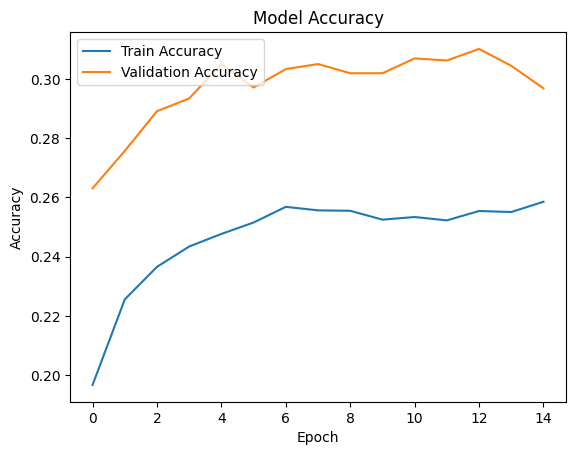

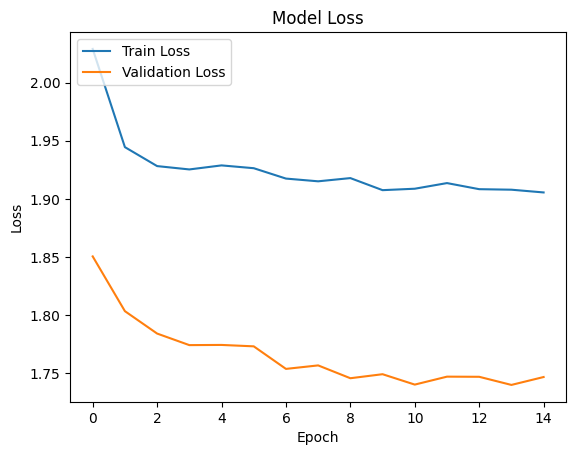

In [ ]:
# Import necessary libraries
import tensorflow as tf  # TensorFlow is the main deep learning framework
from tensorflow.keras import layers, models  # Keras is TensorFlow's high-level API for building models
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data (not used here but commonly used)
from sklearn.preprocessing import StandardScaler  # For scaling data (not used here but commonly used)
import numpy as np  # NumPy for numerical operations

# Load the MNIST dataset
# MNIST is a dataset of 28x28 grayscale images of handwritten digits (0-9)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
# This helps the neural network converge faster during training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
# Neural networks expect 1D input, so we reshape the 2D images into 1D arrays
x_train = x_train.reshape(-1, 28 * 28)  # -1 means automatically infer the size
x_test = x_test.reshape(-1, 28 * 28)

# Build a simple neural network model using Keras Sequential API
model = models.Sequential([
    # First layer: Dense layer with 128 neurons and ReLU activation function
    # ReLU (Rectified Linear Unit) is a common activation function for hidden layers
    layers.Dense(1, activation='relu', input_shape=(28 * 28,)),

    # Dropout layer to prevent overfitting
    # Dropout randomly sets 20% of the neurons to 0 during training to reduce overfitting
    layers.Dropout(0.2),

    # Output layer: Dense layer with 10 neurons (one for each digit) and softmax activation
    # Softmax converts the output into probabilities for each class (digit)
    layers.Dense(10, activation='softmax')
])

# Compile the model
# Specify the optimizer, loss function, and metrics to track during training
model.compile(optimizer='adam',  # Adam is a popular optimizer for deep learning
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

# Train the model
# Fit the model to the training data for 5 epochs (5 full passes through the dataset)
# Also, validate the model on the test data after each epoch
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

# Evaluate the model on the test data
# This calculates the loss and accuracy on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')  # Print the test accuracy

# Plot training & validation accuracy values
# This helps visualize how the model's accuracy improves over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Model Accuracy')  # Title of the plot
plt.ylabel('Accuracy')  # Y-axis label
plt.xlabel('Epoch')  # X-axis label
plt.legend(loc='upper left')  # Add a legend to the plot
plt.show()  # Display the plot

# Plot training & validation loss values
# This helps visualize how the model's loss decreases over epochs
plt.plot(history.history['loss'], label='Train Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Model Loss')  # Title of the plot
plt.ylabel('Loss')  # Y-axis label
plt.xlabel('Epoch')  # X-axis label
plt.legend(loc='upper left')  # Add a legend to the plot
plt.show()  # Display the plot